### Final Project - Course 5 - IBM Machine Learning



The "Customer Conversion Prediction Dataset" is a synthetic dataset created for the purpose of simulating a customer conversion prediction scenario. It consists of information related to potential leads and their interactions with a hypothetical business or website. The dataset includes attributes such as age, gender, location (with a focus on major cities in Pakistan), lead source, engagement metrics, lead status, email interactions, device type, referral sources, form submissions, downloads, click-through rates, response times, follow-up emails, social media engagement, and payment history.

Conversion (Target):
The dataset includes a binary target variable, "Conversion," which indicates whether a lead has converted (1) or not (0) based on strict criteria. Leads are marked as converted if they meet specific conditions related to lead engagement, behavior, age, and location.

Purpose:
This dataset can be used for developing and testing machine learning models to predict customer conversion or the likelihood of leads taking a desired action. It serves as a valuable resource for data analysis, predictive modeling, and optimization of marketing and sales strategies.

References: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-conversion-dataset-for-stuffmart-com

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, precision_score, f1_score, confusion_matrix,\
                            ConfusionMatrixDisplay, roc_curve, roc_auc_score
from keras import optimizers
import keras_tuner
from tensorflow import keras
from keras import Sequential, layers
from keras.layers import Dense
import tensorflow as tf


2023-11-01 18:06:12.187728: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 18:06:12.187756: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 18:06:12.187788: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 18:06:12.194847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 18:06:12.953661: W tensorflow/compiler/

Using TensorFlow backend


In [2]:
df = pd.read_csv('customer_conversion_traing_dataset .csv')

In [3]:
df.head()

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0


### EDA

In [4]:
df.dtypes

LeadID                     int64
Age                        int64
Gender                    object
Location                  object
LeadSource                object
TimeSpent (minutes)        int64
PagesViewed                int64
LeadStatus                object
EmailSent                  int64
DeviceType                object
ReferralSource            object
FormSubmissions            int64
Downloads                  int64
CTR_ProductPage          float64
ResponseTime (hours)       int64
FollowUpEmails             int64
SocialMediaEngagement      int64
PaymentHistory            object
Conversion (Target)        int64
dtype: object

In [5]:
df.size

1900000

In [6]:
df.shape

(100000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LeadID                 100000 non-null  int64  
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Location               100000 non-null  object 
 4   LeadSource             100000 non-null  object 
 5   TimeSpent (minutes)    100000 non-null  int64  
 6   PagesViewed            100000 non-null  int64  
 7   LeadStatus             100000 non-null  object 
 8   EmailSent              100000 non-null  int64  
 9   DeviceType             100000 non-null  object 
 10  ReferralSource         100000 non-null  object 
 11  FormSubmissions        100000 non-null  int64  
 12  Downloads              100000 non-null  int64  
 13  CTR_ProductPage        100000 non-null  float64
 14  ResponseTime (hours)   100000 non-nul

In [8]:
df.isnull().sum()

LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Data Analysis

The dataset consists of 100000 rows and 19 columns, where the columns are (with type
description): LeadID (int64), Age (int64), Gender (object), Location (object), LeadSource
(object), TimeSpent (int64), PagesViewed (int64), LeadStatus (object), EmailSent
(int64), DeviceType (object), ReferralSource (object), FormSubmissions (int64),
Downloads (int64), CTR_ProductPage (float64), ResponseTime (int64)
,FollowUpEmails (int64), SocialMediaEngagement (int64), PaymentHistory (object) ,
Conversion (Target) (int64).
There are no null or duplicate values.
The conversion rate is 1.64% which constituted an unbalanced class and I will work to
better achieve a result.

In [10]:
df['Conversion (Target)'].value_counts(normalize=True) * 100

Conversion (Target)
0    98.353
1     1.647
Name: proportion, dtype: float64

In [11]:
df.dtypes

LeadID                     int64
Age                        int64
Gender                    object
Location                  object
LeadSource                object
TimeSpent (minutes)        int64
PagesViewed                int64
LeadStatus                object
EmailSent                  int64
DeviceType                object
ReferralSource            object
FormSubmissions            int64
Downloads                  int64
CTR_ProductPage          float64
ResponseTime (hours)       int64
FollowUpEmails             int64
SocialMediaEngagement      int64
PaymentHistory            object
Conversion (Target)        int64
dtype: object

In [12]:
df.Gender.unique().tolist()

['Female', 'Male']

In [13]:
df.Location.unique().tolist()

['Faisalabad',
 'Islamabad',
 'Rawalpindi',
 'Karachi',
 'Gujranwala',
 'Lahore',
 'Peshawar',
 'Multan',
 'Sialkot',
 'Quetta']

In [14]:
df.LeadSource.unique().tolist()

['Referral', 'Email', 'Organic', 'Social Media']

In [15]:
df.LeadStatus.unique().tolist()

['Warm', 'Hot', 'Cold']

In [16]:
df.DeviceType.unique().tolist()

['Desktop', 'Tablet', 'Mobile']

In [17]:
df.ReferralSource.unique().tolist()

['Google', 'Direct', 'ReferralSite', 'Twitter', 'Facebook']

In [18]:
df.PaymentHistory.unique().tolist()

['No Payment', 'Good']

In [19]:
df.describe()

,LeadID,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,Conversion (Target)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,39.995810,32.529550,8.502020,5.001580,2.49979,1.498820,0.449336,12.514950,4.984590,110.106390,0.016470
std,28867.657797,11.854746,16.150348,4.029558,3.169473,1.70861,1.117484,0.206320,6.929558,3.166025,52.204422,0.127275
min,1.000000,20.000000,5.000000,2.000000,0.000000,0.00000,0.000000,0.100000,1.000000,0.000000,20.000000,0.000000
25%,25000.750000,30.000000,19.000000,5.000000,2.000000,1.00000,0.000000,0.300000,7.000000,2.000000,65.000000,0.000000
50%,50000.500000,40.000000,33.000000,8.000000,5.000000,3.00000,2.000000,0.400000,13.000000,5.000000,110.000000,0.000000
75%,75000.250000,50.000000,47.000000,12.000000,8.000000,4.00000,2.000000,0.600000,19.000000,8.000000,155.000000,0.000000
max,100000.000000,60.000000,60.000000,15.000000,10.000000,5.00000,3.000000,0.800000,24.000000,10.000000,200.000000,1.000000


In [20]:
df.describe(include=object)

,Gender,Location,LeadSource,LeadStatus,DeviceType,ReferralSource,PaymentHistory
count,100000,100000,100000,100000,100000,100000,100000
unique,2,10,4,3,3,5,2
top,Male,Faisalabad,Organic,Cold,Mobile,ReferralSite,Good
freq,50123,10196,25257,33435,33724,20080,50111


Text(0.5, 1.0, 'Gender vs Conversions')

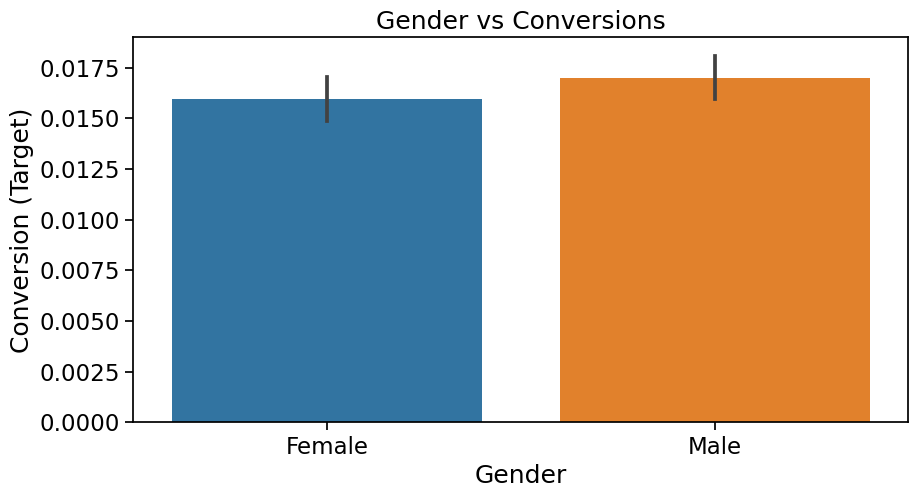

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Gender'], y=df['Conversion (Target)'])
plt.title('Gender vs Conversions')

In [22]:
df.groupby('Gender')['Conversion (Target)'].value_counts(normalize=True)*100

Gender  Conversion (Target)
Female  0                      98.404074
        1                       1.595926
Male    0                      98.302177
        1                       1.697823
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Device Type vs Conversions')

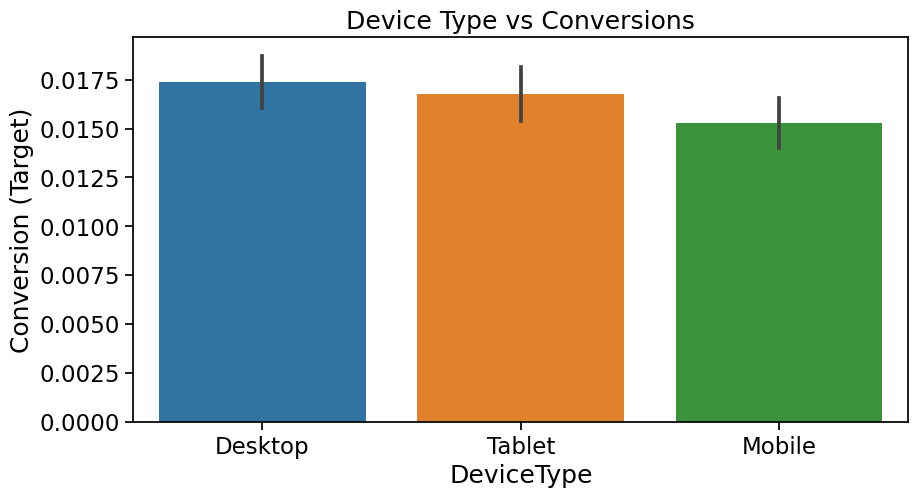

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['DeviceType'], y=df['Conversion (Target)'])
plt.title('Device Type vs Conversions')

In [24]:
df.groupby('DeviceType')['Conversion (Target)'].value_counts(normalize=True)*100

DeviceType  Conversion (Target)
Desktop     0                      98.262938
            1                       1.737062
Mobile      0                      98.469932
            1                       1.530068
Tablet      0                      98.324208
            1                       1.675792
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Location vs Conversions')

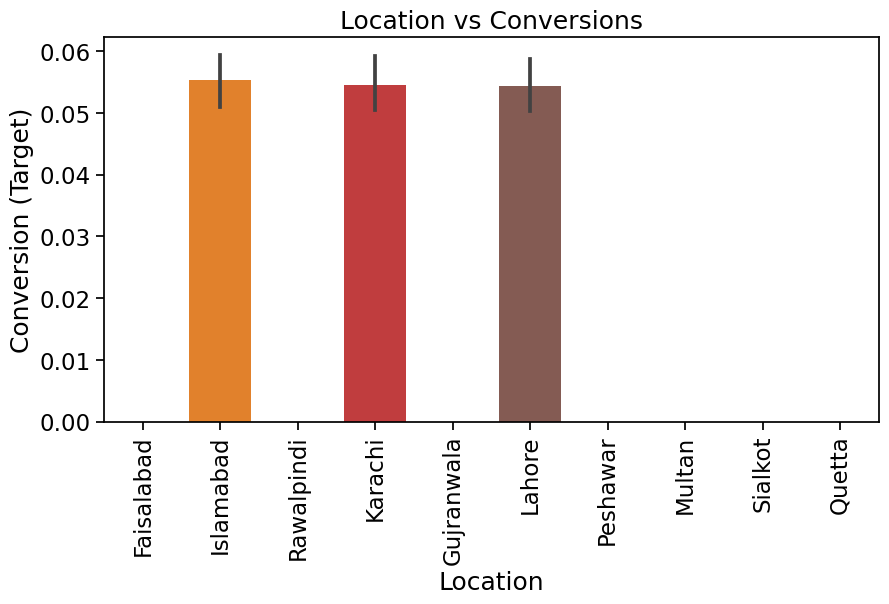

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Location'], y=df['Conversion (Target)'])
plt.xticks(rotation=90)
plt.title('Location vs Conversions')

In [26]:
df.groupby('Location')['Conversion (Target)'].value_counts(normalize=True)*100

Location    Conversion (Target)
Faisalabad  0                      100.000000
Gujranwala  0                      100.000000
Islamabad   0                       94.471561
            1                        5.528439
Karachi     0                       94.546182
            1                        5.453818
Lahore      0                       94.561002
            1                        5.438998
Multan      0                      100.000000
Peshawar    0                      100.000000
Quetta      0                      100.000000
Rawalpindi  0                      100.000000
Sialkot     0                      100.000000
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Lead Source vs Conversions')

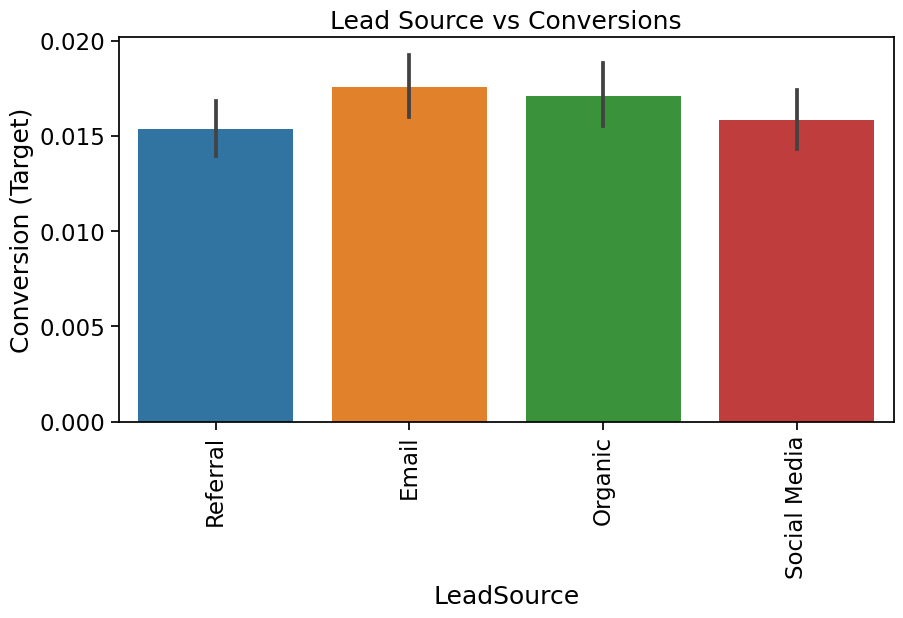

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['LeadSource'], y=df['Conversion (Target)'])
plt.xticks(rotation=90)
plt.title('Lead Source vs Conversions')

In [28]:
df.groupby('LeadSource')['Conversion (Target)'].value_counts(normalize=True)*100

LeadSource    Conversion (Target)
Email         0                      98.244278
              1                       1.755722
Organic       0                      98.289583
              1                       1.710417
Referral      0                      98.461601
              1                       1.538399
Social Media  0                      98.417899
              1                       1.582101
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Lead Status vs Conversions')

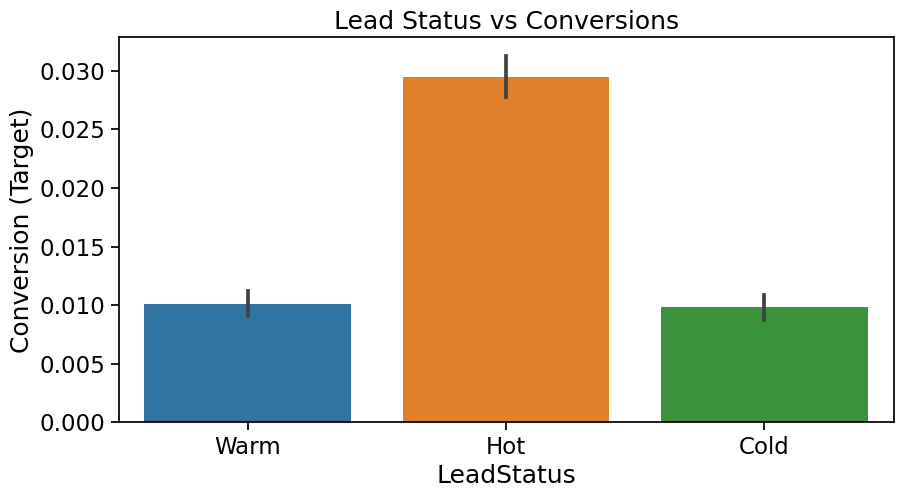

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['LeadStatus'], y=df['Conversion (Target)'])
plt.title('Lead Status vs Conversions')

In [30]:
df.groupby('LeadStatus')['Conversion (Target)'].value_counts(normalize=True)*100

LeadStatus  Conversion (Target)
Cold        0                      99.016001
            1                       0.983999
Hot         0                      97.049988
            1                       2.950012
Warm        0                      98.990294
            1                       1.009706
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Referral Source vs Conversions')

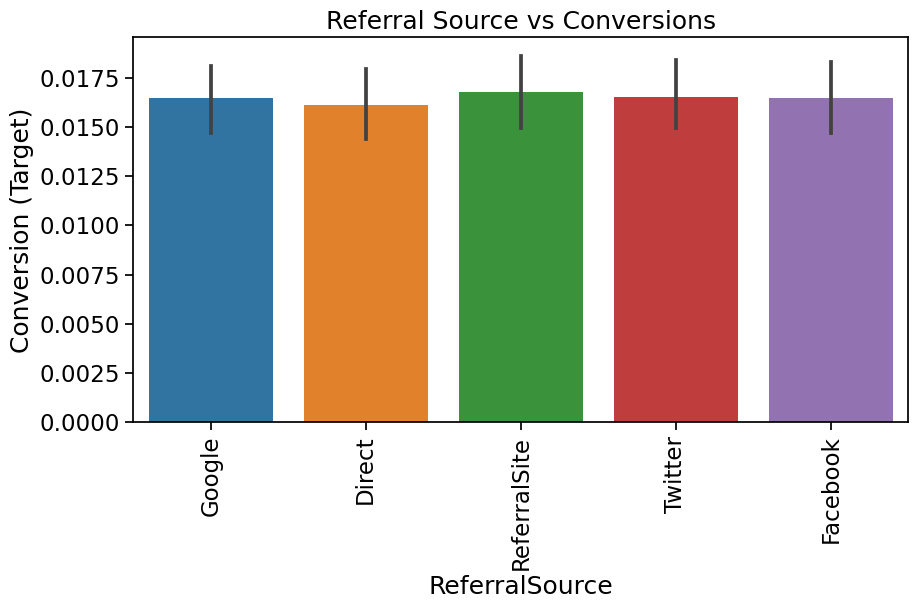

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['ReferralSource'], y=df['Conversion (Target)'])
plt.xticks(rotation=90)
plt.title('Referral Source vs Conversions')

In [32]:
df.groupby('ReferralSource')['Conversion (Target)'].value_counts(normalize=True)*100

ReferralSource  Conversion (Target)
Direct          0                      98.390897
                1                       1.609103
Facebook        0                      98.351265
                1                       1.648735
Google          0                      98.354303
                1                       1.645697
ReferralSite    0                      98.321713
                1                       1.678287
Twitter         0                      98.347066
                1                       1.652934
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Payment History vs Conversions')

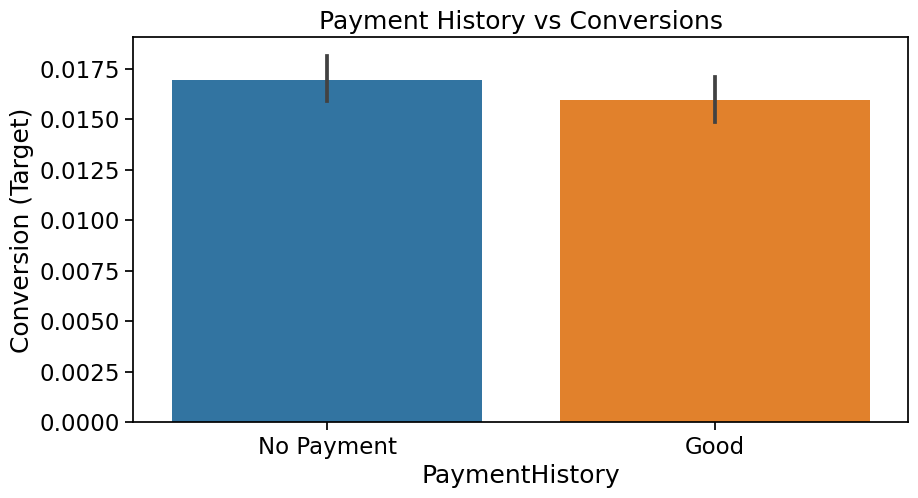

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['PaymentHistory'], y=df['Conversion (Target)'])
plt.title('Payment History vs Conversions')

In [34]:
df.groupby('PaymentHistory')['Conversion (Target)'].value_counts(normalize=True)*100

PaymentHistory  Conversion (Target)
Good            0                      98.401549
                1                       1.598451
No Payment      0                      98.304235
                1                       1.695765
Name: proportion, dtype: float64

In [35]:
heatmap = df[['Age', 'TimeSpent (minutes)', 'PagesViewed', 'EmailSent', 'FormSubmissions', 'Downloads', 
              'ResponseTime (hours)', 'FollowUpEmails', 'SocialMediaEngagement', 'Conversion (Target)']]

In [36]:
heatmap.corr(numeric_only=True)

,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,Conversion (Target)
Age,1.000000,-0.001093,0.003911,-0.001471,0.000805,0.005232,-0.004788,0.003132,0.000385,-0.034631
TimeSpent (minutes),-0.001093,1.000000,-0.003285,-0.000835,-0.006659,-0.001533,-0.004744,-0.002416,-0.000726,0.042850
PagesViewed,0.003911,-0.003285,1.000000,-0.002925,-0.002024,-0.000295,-0.000201,-0.002640,0.000743,0.161940
EmailSent,-0.001471,-0.000835,-0.002925,1.000000,0.002299,-0.006869,-0.004148,0.003876,-0.004717,0.065306
FormSubmissions,0.000805,-0.006659,-0.002024,0.002299,1.000000,0.003229,0.006516,-0.004279,0.001782,-0.001846
Downloads,0.005232,-0.001533,-0.000295,-0.006869,0.003229,1.000000,-0.003749,0.000929,-0.001029,0.001297
ResponseTime (hours),-0.004788,-0.004744,-0.000201,-0.004148,0.006516,-0.003749,1.000000,-0.000662,0.001009,-0.002485
FollowUpEmails,0.003132,-0.002416,-0.002640,0.003876,-0.004279,0.000929,-0.000662,1.000000,0.002029,0.045673
SocialMediaEngagement,0.000385,-0.000726,0.000743,-0.004717,0.001782,-0.001029,0.001009,0.002029,1.000000,0.002615
Conversion (Target),-0.034631,0.042850,0.161940,0.065306,-0.001846,0.001297,-0.002485,0.045673,0.002615,1.000000


<Axes: >

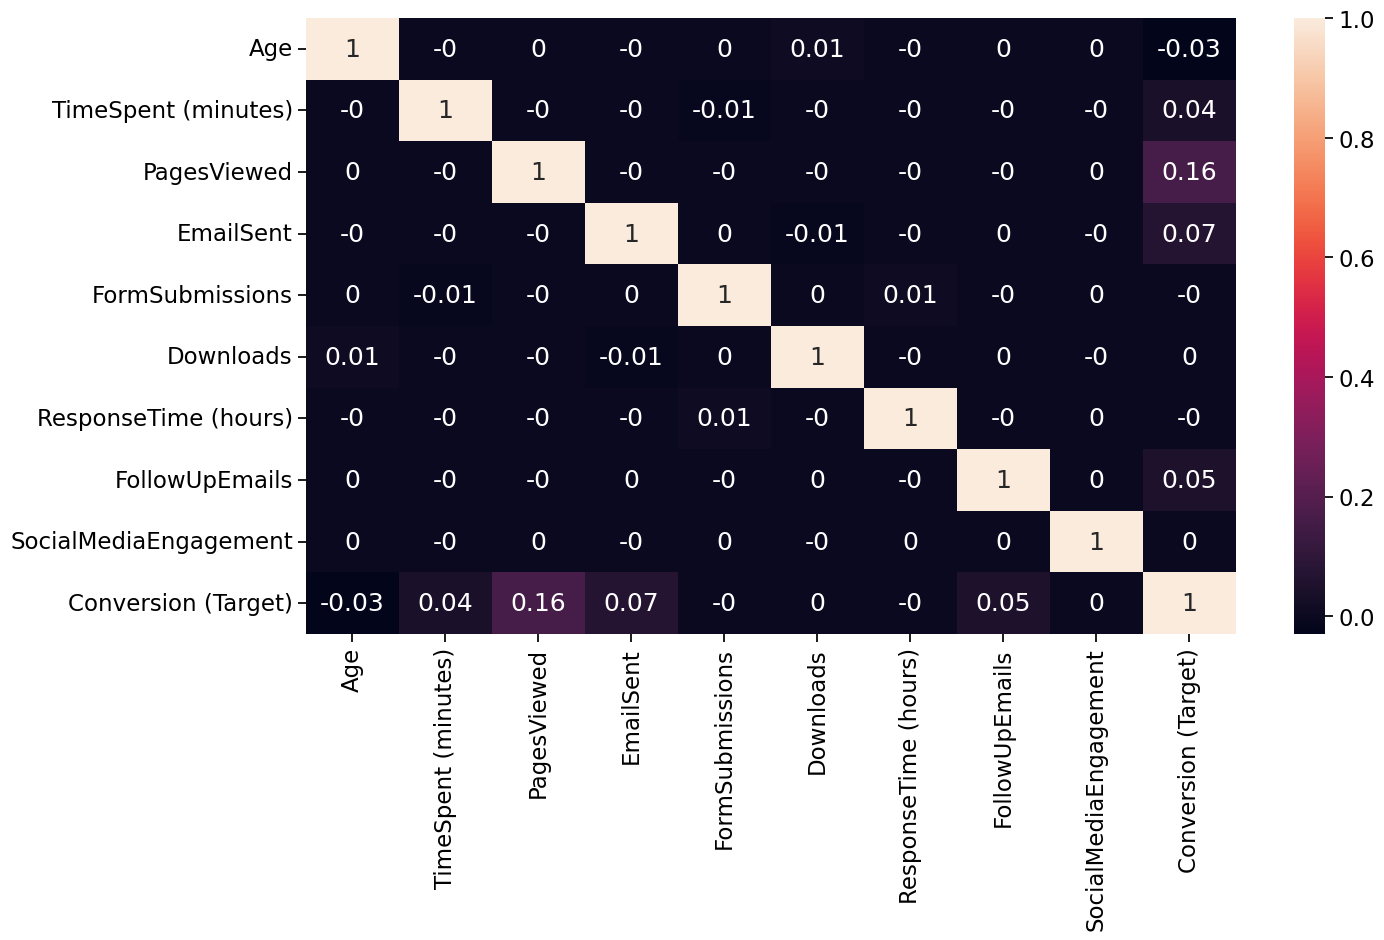

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(round(heatmap.corr(),2), annot=True)

### Machine Learning

The project in question is a challenge, in addition to being classified, it has an
unbalanced target. Before I started modeling, it was necessary to perform One Hot
encoding and Label encoding on several variables that were String. None were
eliminated.
To have a comparative basis for the classification, I carried two test.

#### Preprocessing

In [38]:
test = pd.read_csv('customer_conversion_testing_dataset.csv')

In [39]:
df.dtypes

LeadID                     int64
Age                        int64
Gender                    object
Location                  object
LeadSource                object
TimeSpent (minutes)        int64
PagesViewed                int64
LeadStatus                object
EmailSent                  int64
DeviceType                object
ReferralSource            object
FormSubmissions            int64
Downloads                  int64
CTR_ProductPage          float64
ResponseTime (hours)       int64
FollowUpEmails             int64
SocialMediaEngagement      int64
PaymentHistory            object
Conversion (Target)        int64
dtype: object

In [40]:
data = df.copy()

In [41]:
data = pd.get_dummies(data=data, columns=['Location', 'LeadSource', 'LeadStatus', 'DeviceType', 
                                          'ReferralSource'], drop_first=True, dtype=np.uint8)

In [42]:
test = pd.get_dummies(data=test, columns=['Location', 'LeadSource', 'LeadStatus', 'DeviceType', 
                                          'ReferralSource'], drop_first=True, dtype=np.uint8)

In [43]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male'  else 0)

In [44]:
test['Gender'] = test['Gender'].apply(lambda x: 1 if x == 'Male'  else 0)

In [45]:
data.PaymentHistory.unique().tolist()

['No Payment', 'Good']

In [46]:
data['PaymentHistory'] = data['PaymentHistory'].apply(lambda x: 1 if x == 'Good'  else 0)

In [47]:
test['PaymentHistory'] = test['PaymentHistory'].apply(lambda x: 1 if x == 'Good'  else 0)

In [48]:
data.dtypes

LeadID                           int64
Age                              int64
Gender                           int64
TimeSpent (minutes)              int64
PagesViewed                      int64
EmailSent                        int64
FormSubmissions                  int64
Downloads                        int64
CTR_ProductPage                float64
ResponseTime (hours)             int64
FollowUpEmails                   int64
SocialMediaEngagement            int64
PaymentHistory                   int64
Conversion (Target)              int64
Location_Gujranwala              uint8
Location_Islamabad               uint8
Location_Karachi                 uint8
Location_Lahore                  uint8
Location_Multan                  uint8
Location_Peshawar                uint8
Location_Quetta                  uint8
Location_Rawalpindi              uint8
Location_Sialkot                 uint8
LeadSource_Organic               uint8
LeadSource_Referral              uint8
LeadSource_Social Media  

In [49]:
data.head()

,LeadID,Age,Gender,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),...,LeadSource_Referral,LeadSource_Social Media,LeadStatus_Hot,LeadStatus_Warm,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter
0,1,60,0,30,13,1,4,0,0.3,7,...,1,0,0,1,0,0,0,1,0,0
1,2,27,0,28,4,7,2,2,0.3,13,...,1,0,1,0,0,0,0,0,0,0
2,3,21,0,45,10,9,4,2,0.6,10,...,1,0,0,1,0,1,0,0,0,0
3,4,37,0,45,15,5,1,3,0.3,11,...,0,0,0,1,0,0,0,0,1,0
4,5,35,1,31,11,2,4,3,0.5,9,...,1,0,0,0,0,1,0,1,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LeadID                       100000 non-null  int64  
 1   Age                          100000 non-null  int64  
 2   Gender                       100000 non-null  int64  
 3   TimeSpent (minutes)          100000 non-null  int64  
 4   PagesViewed                  100000 non-null  int64  
 5   EmailSent                    100000 non-null  int64  
 6   FormSubmissions              100000 non-null  int64  
 7   Downloads                    100000 non-null  int64  
 8   CTR_ProductPage              100000 non-null  float64
 9   ResponseTime (hours)         100000 non-null  int64  
 10  FollowUpEmails               100000 non-null  int64  
 11  SocialMediaEngagement        100000 non-null  int64  
 12  PaymentHistory               100000 non-null  int64  
 13  

In [51]:
data.rename(columns={'TimeSpent (minutes)':'TimeSpent_(minutes)', 'ResponseTime (hours)':'ResponseTime_(hours)', 'Conversion (Target)':'Conversion_(Target)'}, inplace=True)

In [52]:
test.rename(columns={'TimeSpent (minutes)':'TimeSpent_(minutes)', 'ResponseTime (hours)':'ResponseTime_(hours)', 'Conversion (Target)':'Conversion_(Target)'}, inplace=True)

In [53]:
X_train = data.drop(columns=['LeadID', 'Conversion_(Target)'])
y_train = data['Conversion_(Target)']

In [54]:
X_test = test.drop(columns=['LeadID', 'Conversion_(Target)'])
y_test = test['Conversion_(Target)']

#### Model 1 - Logistic Regression

In [55]:
LR = LogisticRegression()

In [56]:
scaler = StandardScaler()

In [57]:
pipe = Pipeline(steps=[
        ('Standart Scale', StandardScaler()),
        ('Logistic Regression', LogisticRegression())])

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Standart Scale', StandardScaler()),
                ('Logistic Regression', LogisticRegression())])

In [59]:
pipe.score(X_train,y_train)

0.9841

In [60]:
y_pred = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.9840504876649455

In [61]:
def eval_model(y_test, y_pred):
    print('The accuracy score is :', accuracy_score(y_test, y_pred))
    print('The precision score is :', precision_score(y_test, y_pred))
    print('The r2 score is :', r2_score(y_test, y_pred))
    print('The f1 score is :', f1_score(y_test, y_pred))

In [62]:
eval_model(y_test, y_pred)

The accuracy score is : 0.9840504876649455
The precision score is : 0.4876543209876543
The r2 score is : -0.025890732900009317
The f1 score is : 0.2747826086956522


#### Model 2 - Random Forest with GridSearchCV

In [63]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

In [64]:
best = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=3, n_jobs=-1)

In [65]:
best.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.5s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.6s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.1s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.0006951927961775605, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.3s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.7s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=0.004832930238571752, classifier__penalty=l2,

[CV 2/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.6s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   0.9s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.9s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.6s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.004832930238571752, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   2.9s
[CV 1/5] END cla

[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.4s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   0.8s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.0006951927961775605, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.7s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.8s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   1.2s
[CV 3/5] END cl

[CV 2/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   0.9s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.7s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=0.0006951927961775605, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.6s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.0006951927961775605, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.2s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.9s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=0.004832930238571752, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   2.9s
[

[CV 3/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   0.9s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.1s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.0006951927961775605, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.7s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=0.0018329807108324356, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   0.9s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.004832930238571752, classifier__penalty=l1, classifier__solver=liblinear;, score=0.984 total time=   3.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.004832930238571752, classifier__penalty=l2, classifier__solver=liblinear;, score=0.984 total time=   1.8s
[C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier': [RandomForestClassifier(max_features=31,
                                                                n_estimators=80)],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
                          'classifier__n_estimators': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]}],
             verbose=3)

In [66]:
best.score(X_train, y_train)

1.0

In [67]:
y_pred = best.predict(X_test)

In [68]:
eval_model(y_test, y_pred)

The accuracy score is : 0.9999235035379613
The precision score is : 1.0
The r2 score is : 0.9950796607534772
The f1 score is : 0.9975728155339806


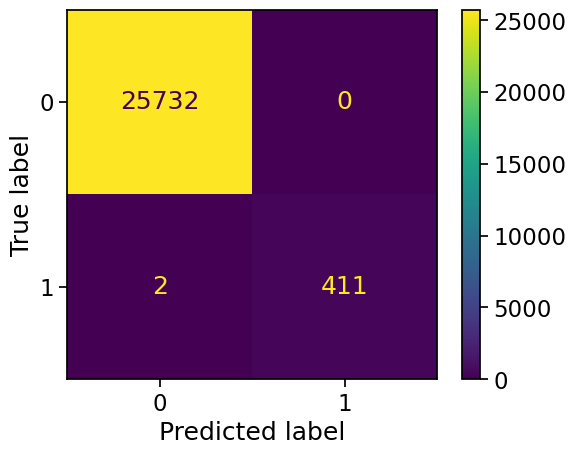

In [69]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=best.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best.classes_)

display.plot()

plt.show()

#### Model 3 - Deep Learning with Keras without normalization

The first deep learning model was the simplest of all and followed the following steps:

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          100000 non-null  int64  
 1   Gender                       100000 non-null  int64  
 2   TimeSpent_(minutes)          100000 non-null  int64  
 3   PagesViewed                  100000 non-null  int64  
 4   EmailSent                    100000 non-null  int64  
 5   FormSubmissions              100000 non-null  int64  
 6   Downloads                    100000 non-null  int64  
 7   CTR_ProductPage              100000 non-null  float64
 8   ResponseTime_(hours)         100000 non-null  int64  
 9   FollowUpEmails               100000 non-null  int64  
 10  SocialMediaEngagement        100000 non-null  int64  
 11  PaymentHistory               100000 non-null  int64  
 12  Location_Gujranwala          100000 non-null  uint8  
 13  

In [71]:
model = Sequential()

2023-11-01 18:17:28.361282: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [72]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=32))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14593 (57.00 KB)
Trainable params: 14593 (57.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0954 - binary_accuracy: 0.9800 - val_loss: 0.0457 - val_binary_accuracy: 0.9845
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0479 - binary_accuracy: 0.9834 - val_loss: 0.0424 - val_binary_accuracy: 0.9851
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0448 - binary_accuracy: 0.9841 - val_loss: 0.0397 - val_binary_accuracy: 0.9860
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0374 - binary_accuracy: 0.9852 - val_loss: 0.0356 - val_binary_accuracy: 0.9871
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0352 - binary_accuracy: 0.9863 - val_loss: 0.0305 - val_binary_accuracy: 0.9875
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0326 - binary_accuracy: 0.9868 - val_loss: 0.0335 - val_binary_accuracy: 0.9871
Epoch 7/50
1000/1000 [==============================

818/818 [==============================] - 1s 828us/step


Text(101.44999999999996, 0.5, 'Actual label')

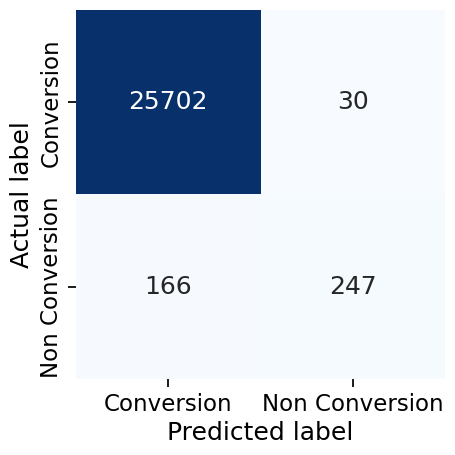

In [74]:
y_predicted = model.predict(X_test)
mat = confusion_matrix(y_test, y_predicted)
labels = ['Conversion', 'Non Conversion']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

#### Model 4 - Deep Learning with Keras with normalization

In the second deep learning model, normalization was performed on the data to see if
there would be an improvement in previous results. The following calculation was
carried out with the stated objective:

In [75]:
X_train = (X_train - X_train.mean())/(X_train.std())

In [76]:
X_test = (X_test - X_test.mean())/(X_test.std())

In [77]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               8448      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 140289 (548.00 KB)
Trainable params: 140

In [78]:
weight_for_0 = 98.353
weight_for_1 = 1.647


In [79]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("Conversion_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=100,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_test, y_test),
    class_weight=class_weight
)


Epoch 1/100
49/49 - 2s - loss: 1.8328 - fn: 1643.0000 - fp: 176.0000 - tn: 98177.0000 - tp: 4.0000 - precision: 0.0222 - recall: 0.0024 - val_loss: 0.0863 - val_fn: 413.0000 - val_fp: 0.0000e+00 - val_tn: 25732.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 2s/epoch - 38ms/step
Epoch 2/100
49/49 - 1s - loss: 0.1621 - fn: 1647.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0797 - val_fn: 413.0000 - val_fp: 0.0000e+00 - val_tn: 25732.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 691ms/epoch - 14ms/step
Epoch 3/100
49/49 - 1s - loss: 0.1381 - fn: 1647.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0634 - val_fn: 413.0000 - val_fp: 0.0000e+00 - val_tn: 25732.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 674ms/epoch - 14ms/step
Epoch 4/100
49/49 - 1s - lo

Epoch 26/100
49/49 - 1s - loss: 0.0494 - fn: 1647.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0418 - val_fn: 413.0000 - val_fp: 0.0000e+00 - val_tn: 25732.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 682ms/epoch - 14ms/step
Epoch 27/100
49/49 - 1s - loss: 0.0454 - fn: 1018.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 629.0000 - precision: 1.0000 - recall: 0.3819 - val_loss: 0.0392 - val_fn: 209.0000 - val_fp: 3.0000 - val_tn: 25729.0000 - val_tp: 204.0000 - val_precision: 0.9855 - val_recall: 0.4939 - 701ms/epoch - 14ms/step
Epoch 28/100
49/49 - 1s - loss: 0.0479 - fn: 730.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 917.0000 - precision: 1.0000 - recall: 0.5568 - val_loss: 0.0416 - val_fn: 220.0000 - val_fp: 2.0000 - val_tn: 25730.0000 - val_tp: 193.0000 - val_precision: 0.9897 - val_recall: 0.4673 - 743ms/epoch - 15ms/step
Epoch 29/100
49/49 - 1s - loss: 0.0551 - fn: 836.0000 - 

Epoch 53/100
49/49 - 1s - loss: 0.0629 - fn: 1081.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 566.0000 - precision: 1.0000 - recall: 0.3437 - val_loss: 0.0380 - val_fn: 257.0000 - val_fp: 7.0000 - val_tn: 25725.0000 - val_tp: 156.0000 - val_precision: 0.9571 - val_recall: 0.3777 - 806ms/epoch - 16ms/step
Epoch 54/100
49/49 - 1s - loss: 0.0336 - fn: 616.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 1031.0000 - precision: 1.0000 - recall: 0.6260 - val_loss: 0.0361 - val_fn: 197.0000 - val_fp: 24.0000 - val_tn: 25708.0000 - val_tp: 216.0000 - val_precision: 0.9000 - val_recall: 0.5230 - 732ms/epoch - 15ms/step
Epoch 55/100
49/49 - 1s - loss: 0.0385 - fn: 553.0000 - fp: 1.0000 - tn: 98352.0000 - tp: 1094.0000 - precision: 0.9991 - recall: 0.6642 - val_loss: 0.0443 - val_fn: 194.0000 - val_fp: 19.0000 - val_tn: 25713.0000 - val_tp: 219.0000 - val_precision: 0.9202 - val_recall: 0.5303 - 714ms/epoch - 15ms/step
Epoch 56/100
49/49 - 1s - loss: 0.0678 - fn: 787.0000 - fp: 2.0000 - tn: 98351.00

Epoch 80/100
49/49 - 1s - loss: 0.0222 - fn: 316.0000 - fp: 2.0000 - tn: 98351.0000 - tp: 1331.0000 - precision: 0.9985 - recall: 0.8081 - val_loss: 0.0558 - val_fn: 195.0000 - val_fp: 18.0000 - val_tn: 25714.0000 - val_tp: 218.0000 - val_precision: 0.9237 - val_recall: 0.5278 - 703ms/epoch - 14ms/step
Epoch 81/100
49/49 - 1s - loss: 0.0330 - fn: 420.0000 - fp: 0.0000e+00 - tn: 98353.0000 - tp: 1227.0000 - precision: 1.0000 - recall: 0.7450 - val_loss: 0.0296 - val_fn: 152.0000 - val_fp: 34.0000 - val_tn: 25698.0000 - val_tp: 261.0000 - val_precision: 0.8847 - val_recall: 0.6320 - 720ms/epoch - 15ms/step
Epoch 82/100
49/49 - 1s - loss: 0.0524 - fn: 654.0000 - fp: 2.0000 - tn: 98351.0000 - tp: 993.0000 - precision: 0.9980 - recall: 0.6029 - val_loss: 0.0358 - val_fn: 194.0000 - val_fp: 17.0000 - val_tn: 25715.0000 - val_tp: 219.0000 - val_precision: 0.9280 - val_recall: 0.5303 - 716ms/epoch - 15ms/step
Epoch 83/100
49/49 - 1s - loss: 0.0252 - fn: 433.0000 - fp: 1.0000 - tn: 98352.0000 -

818/818 [==============================] - 1s 919us/step


Text(101.44999999999996, 0.5, 'Actual label')

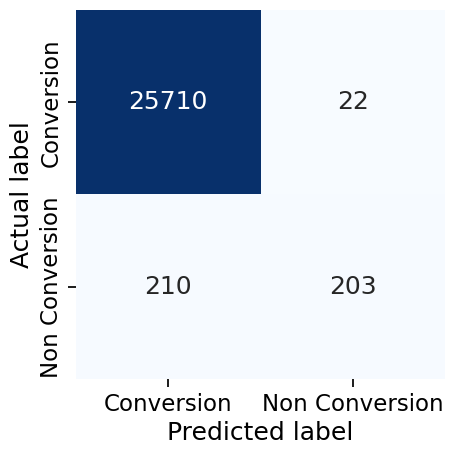

In [93]:
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Conversion', 'Non Conversion']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

#### Model 5 - Deep Learning with Keras with normalization and Keras Tuner

The last model was worked on with normalization and in conjunction with Keras Tuner
to see if it was possible to achieve a better result than the previous ones.

In [81]:
def build_model(hp):
    model = keras.Sequential()
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="sigmoid"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(from_logits=True)])
    return model

In [87]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="final_project",
    project_name="Keras-KT",
    objective='val_loss',
)


In [88]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(from_logits=True)])

In [89]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [90]:
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), class_weight=class_weight)

Trial 3 Complete [00h 02m 50s]
val_loss: 0.04463185742497444

Best val_loss So Far: 0.04463185742497444
Total elapsed time: 00h 07m 23s


In [91]:
tuner.results_summary()

Results summary
Results in final_project/Keras-KT
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 416
activation: relu
dropout: True
lr: 0.008939663601264709
Score: 0.04463185742497444

Trial 0 summary
Hyperparameters:
units: 96
activation: tanh
dropout: True
lr: 0.0010360153239971654
Score: 0.05789457820355892

Trial 1 summary
Hyperparameters:
units: 480
activation: tanh
dropout: False
lr: 0.0033823594237946666
Score: 0.058096207678318024


In [94]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
model.fit(x=X_train, y=y_train, epochs=100)


Epoch 1/100
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0680 - auc_1: 0.8793
Epoch 2/100
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0395 - auc_1: 0.9824
Epoch 3/100
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0340 - auc_1: 0.9866
Epoch 4/100
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0314 - auc_1: 0.9890
Epoch 5/100
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0291 - auc_1: 0.9910
Epoch 6/100
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0268 - auc_1: 0.9922
Epoch 7/100
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0245 - auc_1: 0.9941
Epoch 8/100
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0223 - auc_1: 0.9950
Epoch 9/100
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0204 - auc_1: 0.9958
Epoch 10/100
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0191 - auc_1: 0.9960

3125/3125 [==============================] - 7s 2ms/step - loss: 4.5493e-04 - auc_1: 1.0000
Epoch 82/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.9675e-04 - auc_1: 1.0000
Epoch 83/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.8504e-04 - auc_1: 1.0000
Epoch 84/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.7363e-04 - auc_1: 1.0000
Epoch 85/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.7088e-04 - auc_1: 1.0000
Epoch 86/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.4755e-04 - auc_1: 1.0000
Epoch 87/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.4321e-04 - auc_1: 1.0000
Epoch 88/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.2666e-04 - auc_1: 1.0000
Epoch 89/100
3125/3125 [==============================] - 7s 2ms/step - loss: 3.0456e-04 - auc_1: 1.0000
Epoch 90/100
3125/3125 [==============================] - 7s 2ms/ste

818/818 [==============================] - 1s 1ms/step


Text(101.44999999999996, 0.5, 'Actual label')

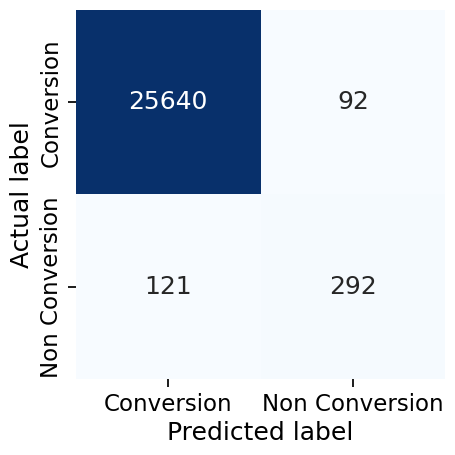

In [95]:
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Conversion', 'Non Conversion']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Among the models presented, Random Forest was the one that performed best in
achieving an adequate classification in this dataset.
The main business insights were that emails and the time an individual spends on the
website are the biggest conversion drivers, so marketing and developers can pursue
this path.
I need to study more Deep Learning to achieve better results in classification with this
technique, as traditional techniques have surpassed it.